## Tutorial 2: The Perceptron
### January 19, 2023

#### The perceptron

In [1]:
## Importing libraries
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import numpy.matlib

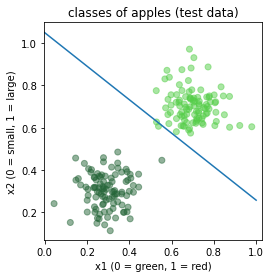

0.99


In [3]:
## Defining a function that generates data for 2 classes (inputs x and desired outputs f(x))
def generate_data(means, sigma, ndatapoints):
    nclasses = 2
    inputs = np.zeros((nclasses * ndatapoints, 2)) ## input examples (apples)
    labels = np.zeros((nclasses * ndatapoints, 1)) ## desired outputs
    colors = np.zeros((nclasses * ndatapoints, 3)) ## class colours 
    for c in range(0, nclasses):
        starti = c * ndatapoints
        endi = (c + 1) * ndatapoints
        inputs[starti:endi, :] = means[c] + sigma * random.standard_normal((ndatapoints, 2)) ## adding some variability to x1 and x2
        labels[starti:endi, :] = c
        colors[starti:endi, :] = np.matlib.repmat(np.random.rand(1,3),ndatapoints,1)
    
    ## Randomizing the order of input examples
    randvec = np.random.permutation(nclasses * ndatapoints)  
    inputs = inputs[randvec,:]
    labels = labels[randvec,:]
    colors = colors[randvec,:] 
    return inputs, labels, colors;

## Generating test data   
means = (0.3,0.7) 
sigma = 0.08
ndatapoints = 100
[inputs, labels, colors] = generate_data(means, sigma, ndatapoints)

## Defining pretrained weights (b, w1, w2)
weights = np.array([-0.01261552,  0.00952113,  0.01201932]) 

## Defining a function for computing and plotting the decision boundary
def plot_boundary(weights, figi):
    b = weights[0]; w1 = weights[1]; w2 = weights[2]
    slope = -(b / w2) / (b / w1)
    y_intercept = -b / w2
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept
    plt.figure(figi)
    plt.plot(x, y)
    plt.pause(0.4)

## Showing the generated test data and decision boundary
figi = 1; plt.figure(figi)
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
plt.axis('square')  
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (test data)')
plot_boundary(weights, figi)

## Defining a function for predicting output
def predict(input, weights):
    summation = np.dot(input, weights[1:]) + weights[0]
    if summation > 0:
        prediction = 1
    else:
        prediction = 0            
    return prediction

## Defining a wrapper function that predicts outputs for all input examples
def predict_wrapper(inputs, weights):
    npredictions = inputs.shape[0]
    predictions = np.zeros(npredictions)
    for i in range(0, npredictions):
        predictions[i] = predict(inputs[i,:], weights)      
    return predictions

## Computing the perceptron accuracy
predictions = predict_wrapper(inputs, weights)
errors = labels.transpose() - predictions # nonzero entries indicate errors
nerrors = np.sum(errors**2)
accuracy = 1 - (nerrors / errors.shape[1])

print(accuracy)

#### Training the perceptron

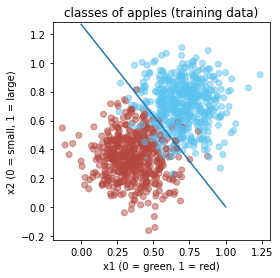

In [12]:
## Generating training data   
means = (0.35,0.7) 
sigma = 0.15
ndatapoints = 500
[inputs, labels, colors] = generate_data(means, sigma, ndatapoints)

## Displaying the generated training data
# figi = 2; plt.figure(figi)
# plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
# plt.axis('square')  
# plt.xlabel('x1 (0 = green, 1 = red)')
# plt.ylabel('x2 (0 = small, 1 = large)')
# plt.title('classes of apples (training data)')

## Defining a function for training the perceptron
def train(inputs, labels, learning_rate, niterations, figi):   
    weights = 0.001 * random.standard_normal(inputs.shape[1]+1)   
    errors = np.zeros((inputs.shape[0], niterations))
    j = 0
    for _ in range(niterations):
        i = 0
        for input, label in zip(inputs, labels):
            prediction = predict(input, weights)  
            weights[1:] += learning_rate * (label - prediction) * input
            weights[0] += learning_rate * (label - prediction)
            errors[i,j] = label - prediction
            # plot_boundary(weights, figi)
            i += 1   
        j += 1        
    return weights, errors;

## Training the perceptron
learning_rate = 0.01
niterations = 20 # epochs
# plt.figure(figi)
# plt.xlim(-10,10); plt.ylim(-10,10)
[weights, errors] = train(inputs, labels, learning_rate, niterations, figi)
# plt.figure(figi); plt.xlim(0,1); plt.ylim(0,1) # zoom in to final solution

## Showing training data and learned boundary
figi = 3; plt.figure(figi)
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
plt.axis('square')  
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (training data)')
plot_boundary(weights, figi)

#### Testing the perceptron

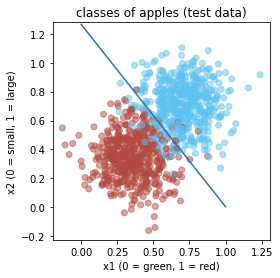

0.928


In [13]:
figi = 4; plt.figure(figi)
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
plt.axis('square')  
plt.xlabel('x1 (0 = green, 1 = red)')
plt.ylabel('x2 (0 = small, 1 = large)')
plt.title('classes of apples (test data)')
plot_boundary(weights, figi)  # show generated data and decision boundary

## Computing the perceptron accuracy
predictions = predict_wrapper(inputs, weights)
errors = labels.transpose() - predictions # nonzero entries indicate errors
nerrors = np.sum(errors**2)
accuracy = 1 - ( nerrors / errors.shape[1] )

print(accuracy)